Step 1 Creating token


In [41]:
with open("Data.txt", "r",encoding="utf-8") as file:
    raw_text = file.read()

print("total number of characters: ", len(raw_text))
print(raw_text[:100])

total number of characters:  20482
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no g


Tokenize all the char into tokens 


In [42]:
import re

# Fix regex: handle '--' and '|' separately, not in character class
re_tokens = re.split(r'(--|\||[.,!?;:_()\"“”‘’\'\n\s])', raw_text)
result = [token for token in re_tokens if token.strip() != '']
print(result[:20])


['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was']


Conversion into token ids


tokenized text-> Vocabulary (usually sorted alphabatically and then assigned an ID)

In [3]:
all_words = sorted(list(set(result)))
print("total number of tokens: ", len(all_words))

total number of tokens:  1130


In [4]:
dict_token={token:integer for integer,token in enumerate(all_words)}

In [5]:
for i , item in enumerate(dict_token.items()):
    print(item)
    if i >= 50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


Later we need to convert token id into words so , we need a inverse version of vocabulary which will map token IDs back to corresponding text tokens.

Create a tokenizer class which take vocabulary as a input , then any newe text gets preprocessed in the encode function and decode the token id back to text in decode function

In [6]:
class Tokenizer:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i: t for t, i in vocab.items()}  #reverse mapping
    
    def encode(self, text):
        re_tokens = re.split(r'(--|\||[.,!?;:_()\"“”‘’\'\n\s])', text)
        result = [token for token in re_tokens if token.strip() != '']
        token_ids= [self.str_to_int[token] for token in result] #assign ids to each word , i .e token
        return token_ids  # assign  token ids

    def decode(self, token_ids):
        text= " ".join([self.int_to_str[id] for id in token_ids if id in self.int_to_str]) # assign words to each token id
        #replace space before punctuation
        text = re.sub(r'\s([.,!?;:_()\"“”‘’\'])', r'\1', text) 
        return text
    

instantiate a new tokenizer object from the SimpleTOkenizer class

In [10]:
Tokenizer_obj = Tokenizer(dict_token)

text=" It's the last he painted, you know , Mrs. Gisburn said with pardonable pride. "

ids= Tokenizer_obj.encode(text)

print(ids)

[56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 67, 7, 38, 851, 1108, 754, 793, 7]


In [11]:
Tokenizer_obj.decode(ids)


"It' s the last he painted, you know, Mrs. Gisburn said with pardonable pride."

In [12]:
text= " do you like tea?"
print(Tokenizer_obj.encode(text)) # hello is not in the vocabulary so it will give key error

[355, 1126, 628, 975, 10]


Special context tokens: modified the tonekeizer to handle unknown words and if there are more than 2 text sources, also add  end of text to let the llm know the end of a particular segment

In [7]:
all_tokens= sorted(list(set(result)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])      # add special tokens to the vocabulary

dict_token2={token:integer for integer,token in enumerate(all_tokens)}

In [8]:
len(dict_token2)
dict_token2["<|endoftext|>"]

1130

In [9]:
for i , item in enumerate(list(dict_token2.items())[-5:]):
    print(item)


('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [11]:
class Tokenizerv2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i: t for t, i in vocab.items()}  #reverse mapping
    
    def encode(self, text):
        re_words = re.split(r'([,.:;?_!"()\'] |--|\s)', text)
        result = [token for token in re_words if token.strip() != '']
        token=[item if item in self.str_to_int else "<|unk|>" for item in result] #assign ids to each word , i .e token
        token_ids=[self.str_to_int[s] for s in token]
        return token_ids  # assign  token ids
        

    def decode(self, token_ids):
        text= " ".join([self.int_to_str[id] for id in token_ids]) # assign words to each token id
        #replace space before punctuation
        text = re.sub(r'\s([.,!?;:_()\"“”‘’\'])', r'\1', text)  
        return text

In [12]:
Tokenizer1_obj = Tokenizerv2(dict_token2)

In [13]:
text2= " How is the weather today? <|endoftext|> -- it's great! Do you like tea or coffee? <|endoftext|>I prefer tea. t's the last he painted, you know , Mrs. Gisburn said with pardonable pride."
ids= Tokenizer1_obj.encode(text2) 
print(ids)
Tokenizer1_obj.decode(ids)

[52, 584, 988, 1131, 1131, 1131, 1130, 6, 1131, 508, 1131, 1131, 1126, 628, 975, 734, 1131, 1131, 1131, 1131, 975, 1131, 1131, 988, 602, 533, 746, 1131, 1126, 596, 1131, 67, 1131, 38, 851, 1108, 754, 1131]


'How is the <|unk|> <|unk|> <|unk|> <|endoftext|> -- <|unk|> great <|unk|> <|unk|> you like tea or <|unk|> <|unk|> <|unk|> <|unk|> tea <|unk|> <|unk|> the last he painted <|unk|> you know <|unk|> Mrs <|unk|> Gisburn said with pardonable <|unk|>'

Byte Pair Encoding

In [14]:
pip install tiktoken

Note: you may need to restart the kernel to use updated packages.


In [15]:
import tiktoken
import matplotlib

In [16]:
print(tiktoken.__version__)

0.9.0


In [17]:
Tokenizerv3=tiktoken.get_encoding("gpt2")  # earlier we created our own class

In [18]:
text= " Hello, do you like tea? <|endoftext|> -- it's great! Do you like tea or coffee? <|endoftext|>I prefer tea. t's the last he painted, you know , Mr. sarang pratap said with pardonable pride."

integer=Tokenizerv3.encode(text,allowed_special={"<|endoftext|>"})

print(integer)

[18435, 11, 466, 345, 588, 8887, 30, 220, 50256, 1377, 340, 338, 1049, 0, 2141, 345, 588, 8887, 393, 6891, 30, 220, 50256, 40, 4702, 8887, 13, 256, 338, 262, 938, 339, 13055, 11, 345, 760, 837, 1770, 13, 29008, 648, 778, 265, 499, 531, 351, 27322, 540, 11293, 13]


In [19]:
string=Tokenizerv3.decode(integer)
print(string)

 Hello, do you like tea? <|endoftext|> -- it's great! Do you like tea or coffee? <|endoftext|>I prefer tea. t's the last he painted, you know , Mr. sarang pratap said with pardonable pride.


Creating INPUT-Target Pairs

we are going to implement a data loader that fetches the input-target paris using a sliding window approach.

In [20]:
with open("Data.txt", "r",encoding="utf-8") as file:
    raw_text = file.read()
    
enc_text=Tokenizerv3.encode(raw_text)

print(f"Length of the encoded text in tokens: {len(enc_text)}")

Length of the encoded text in tokens: 5147


In [21]:
enc_Sample=enc_text[50:] #remove first 50 tokens for demonstration as it results in a slightly  more intersting

In [22]:
print(enc_Sample)

[290, 4920, 2241, 287, 257, 4489, 64, 319, 262, 34686, 41976, 13, 357, 10915, 314, 2138, 1807, 340, 561, 423, 587, 10598, 393, 28537, 2014, 198, 198, 1, 464, 6001, 286, 465, 13476, 1, 438, 5562, 373, 644, 262, 1466, 1444, 340, 13, 314, 460, 3285, 9074, 13, 46606, 536, 5469, 438, 14363, 938, 4842, 1650, 353, 438, 2934, 489, 3255, 465, 48422, 540, 450, 67, 3299, 13, 366, 5189, 1781, 340, 338, 1016, 284, 3758, 262, 1988, 286, 616, 4286, 705, 1014, 510, 26, 475, 314, 836, 470, 892, 286, 326, 11, 1770, 13, 8759, 2763, 438, 1169, 2994, 284, 943, 17034, 318, 477, 314, 892, 286, 526, 383, 1573, 11, 319, 9074, 13, 536, 5469, 338, 11914, 11, 33096, 663, 4808, 3808, 62, 355, 996, 484, 547, 12548, 287, 281, 13079, 410, 12523, 286, 22353, 13, 843, 340, 373, 407, 691, 262, 9074, 13, 536, 48819, 508, 25722, 276, 13, 11161, 407, 262, 40123, 18113, 544, 9325, 701, 11, 379, 262, 938, 402, 1617, 261, 12917, 905, 11, 5025, 502, 878, 402, 271, 10899, 338, 366, 31640, 12, 67, 20811, 1, 284, 910, 11, 351, 10

The context size determines how many tokens are included in the input

In [23]:
context_size= 4 #length of input sequence
# the model is train to look at the previous 4 tokens to predict the next token
# the X input [1,2,3,4]  and Y output [2,3,4,5] 

X=enc_Sample[: context_size]  # all but last token
Y=enc_Sample[1:context_size+1]  # all but first token
print("X (input):", X) #
print("Y (output):", Y)

X (input): [290, 4920, 2241, 287]
Y (output): [4920, 2241, 287, 257]


processing the input with the output, where output is input shifted by open position i.e if input is 290 output is 4920, if input is 290, 4920 then output is 2241.... and so on


In [24]:
for i in range (1, context_size+1):
    context=enc_Sample[:i]
    desired=enc_Sample[i]  # the next token after the context

    print(f"when input is {context} the desired output  which llm is supposed to predict is {desired}")

when input is [290] the desired output  which llm is supposed to predict is 4920
when input is [290, 4920] the desired output  which llm is supposed to predict is 2241
when input is [290, 4920, 2241] the desired output  which llm is supposed to predict is 287
when input is [290, 4920, 2241, 287] the desired output  which llm is supposed to predict is 257


In [25]:
for  i in range (1, context_size+1):
    context=enc_Sample[:i]
    desired=enc_Sample[i]  # the next token after the context

    print(f"when input is: {Tokenizerv3.decode(context)} --output--> {Tokenizerv3.decode([desired])}")

when input is:  and --output-->  established
when input is:  and established --output-->  himself
when input is:  and established himself --output-->  in
when input is:  and established himself in --output-->  a


Implemet a data loader which creates these input output pairs or tensors efficiently so we use pytorch and tensors( consider it just an array chill!!)

step 1: tokenize the entire text
step 2: sliding window to chunk the book into overlapping sequence
step 3:  return the total number of rows in the dataset
step 4: return a single row from the dataset

In [26]:
from torch.utils.data import Dataset, DataLoader

class GPTDatasetv1(Dataset):
    def __init__(self,txt, tokenizer,max_length,stride):
        
        self.input_ids=[]
        self.target_ids=[]
        
        #tokenize the entire text
        token_ids = tokenizer.encode(txt,allowed_special={"<|endoftext|>"})
        
        for i in range(0, len(token_ids)-max_length, stride):
            input_id = token_ids[i:i+max_length]
            target_id = token_ids[i+1:i+max_length+1]
            
            self.input_ids.append(torch.tensor(input_id))
            self.target_ids.append(torch.tensor(target_id))
    def __len__(self):
        return len(self.input_ids)
    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

Step 1 : initiate the tokenizer
step 2: create dataset
step 3: drop _last = True drops the last batch if it is shorter than the specified batch_size to prevent loss spikes during training

step4: The number of cpu processes to use for preporcessing

In [31]:
def create_dataloader_v1(text, batch_size=4, max_length=256, stride=128, shuffle=True, drop_last=True, num_workers=0): #num_worker threads on cpu for parrallel processing , #max length is context length, for gpt it can be 256 for us it was 4
    #stride is the jump length between two sequences
    tokenizer=tiktoken.get_encoding("gpt2")
    
    #create dataset
    dataset=GPTDatasetv1(text, tokenizer,max_length,stride)
    
    #create dataloader
    dataloader= DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last, num_workers=num_workers)
    
    return dataloader

In [32]:
#lets test the dataloader with a batch size of 1 for an llm,
#with context size of 4



In [44]:
with open("Data.txt", "r",encoding="utf-8") as file:
    raw_text = file.read()

In [36]:
import torch
print(torch.__version__)
dataloader=create_dataloader_v1(raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)

data_iter= iter(dataloader)
first_batch=next(data_iter)
print(first_batch)

2.5.1
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [39]:
second_batch=next(data_iter)
print(second_batch)


[tensor([[1464, 1807, 3619,  402]]), tensor([[1807, 3619,  402,  271]])]


In [40]:
dataloader=create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4, shuffle=False)

data_iter= iter(dataloader)
inputs, targets= next(data_iter)
print("inputs: ", inputs)
print("targets: ", targets)


inputs:  tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
targets:  tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


Token embedding

In [71]:
#https://colab.research.google.com/drive/1SbRql12UY94Dh1sx5xK9MqA3QcpNKp4y?authuser=3#scrollTo=-2CkMB85Bo_o

Position Embedding

In [60]:
vocab_size=50257  #vocab size of gpt2
vector_dimen=256 #embedding dimension
embedding_layer=torch.nn.Embedding(vocab_size,vector_dimen)
print(embedding_layer)

Embedding(50257, 256)


In [63]:
print(embedding_layer)  # (vocab_size, embedding_dim)

Embedding(50257, 256)


In [64]:
max_length=4
dataloader=create_dataloader_v1(raw_text, batch_size=8, max_length=max_length,stride=max_length, shuffle=False)
data_iter=iter(dataloader)

input_from_dataloader, targets= next(data_iter)

In [65]:
print("Token IDs:\n", input_from_dataloader)
print("\nInputs shape:", input_from_dataloader.shape)  # (batch_size, sequence_length)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape: torch.Size([8, 4])


we got token id for all the tokens, so we will try to create a embedding layer by using the token id and vector dimenesions

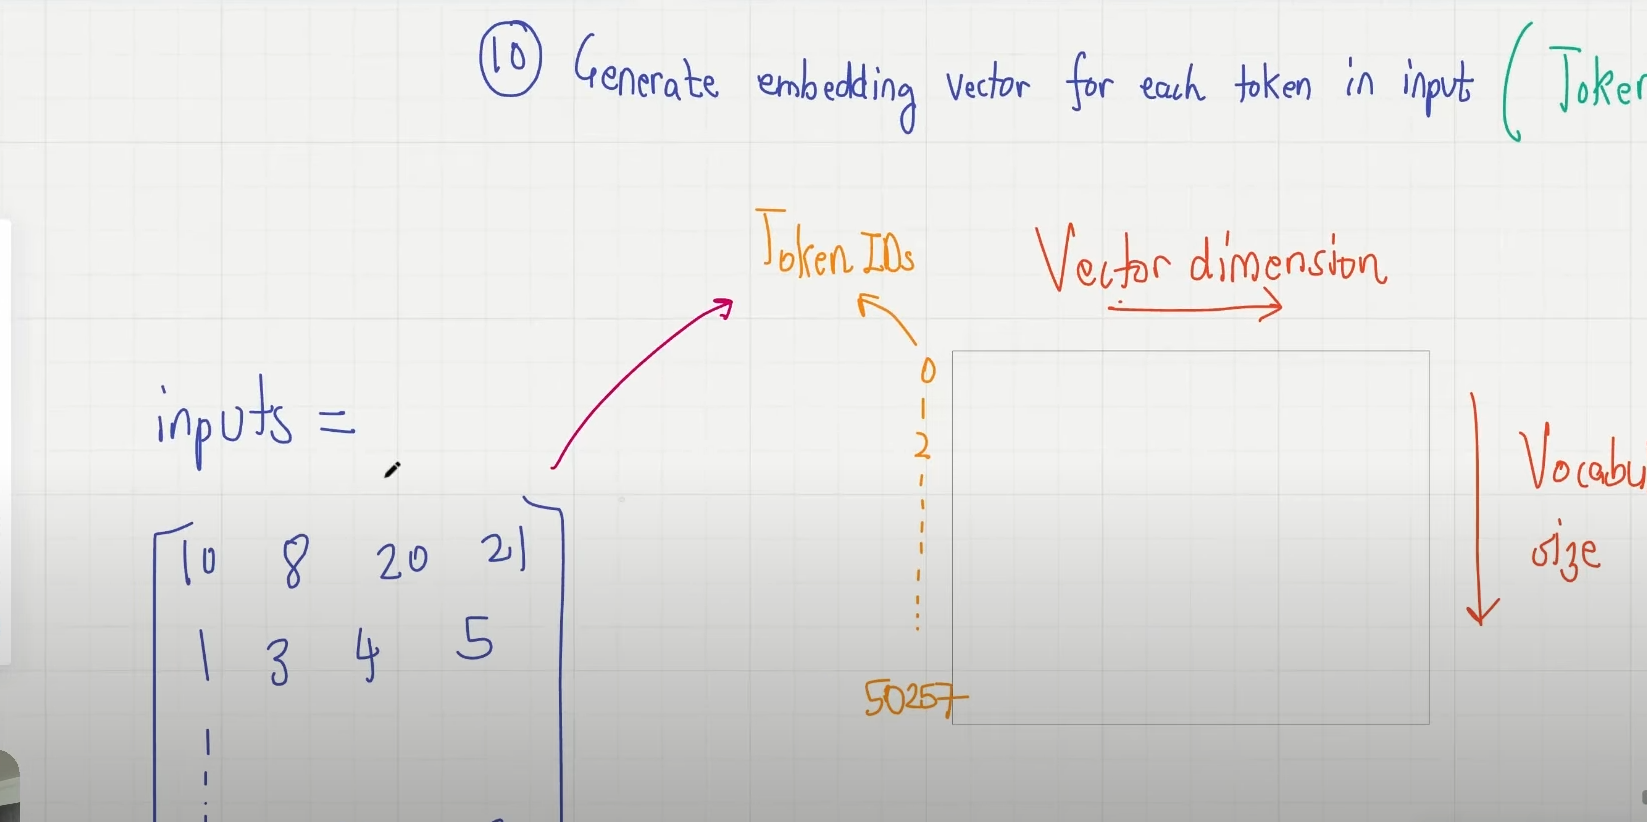

We can see the token id tensor is 8*4 Dimensional, meaning data batch consists of 8 text samples with 4 words

lets now use the embedding layer to embedd these token ids into 256 dimensional vector:


In [ ]:
token_embeddings= embedding_layer(input_from_dataloader)
print("\nToken Embeddings shape:", token_embeddings.shape)  


Token Embeddings shape: torch.Size([8, 4, 256])


now each token id is embedded as 256-dimensional vector

In [ ]:
context_length= max_length
post_embedding_layer= torch.nn.Embedding(context_length, vector_dimen) # trying to create a embedding layer for positional embedding# same layer as embedding metrics , then only we will add both metrics
print(post_embedding_layer)

Embedding(4, 256)


embedding_layer_metric + position_embedding_metrics = input metrics

we only need 4 position vector, for 4 context (or words) , we can use the same position vector for other rows of input tokens (or words), since their order is also same

In [74]:
#generate position embedding for each token in the sequence by passing positions
position_embedding=post_embedding_layer(torch.arange(0, max_length)) #max_length is 4 here or 

print(position_embedding.shape)

torch.Size([4, 256])


postion embedding tensor contains of 4* 256 dimenion , now  we will add position embedding to token embedding 
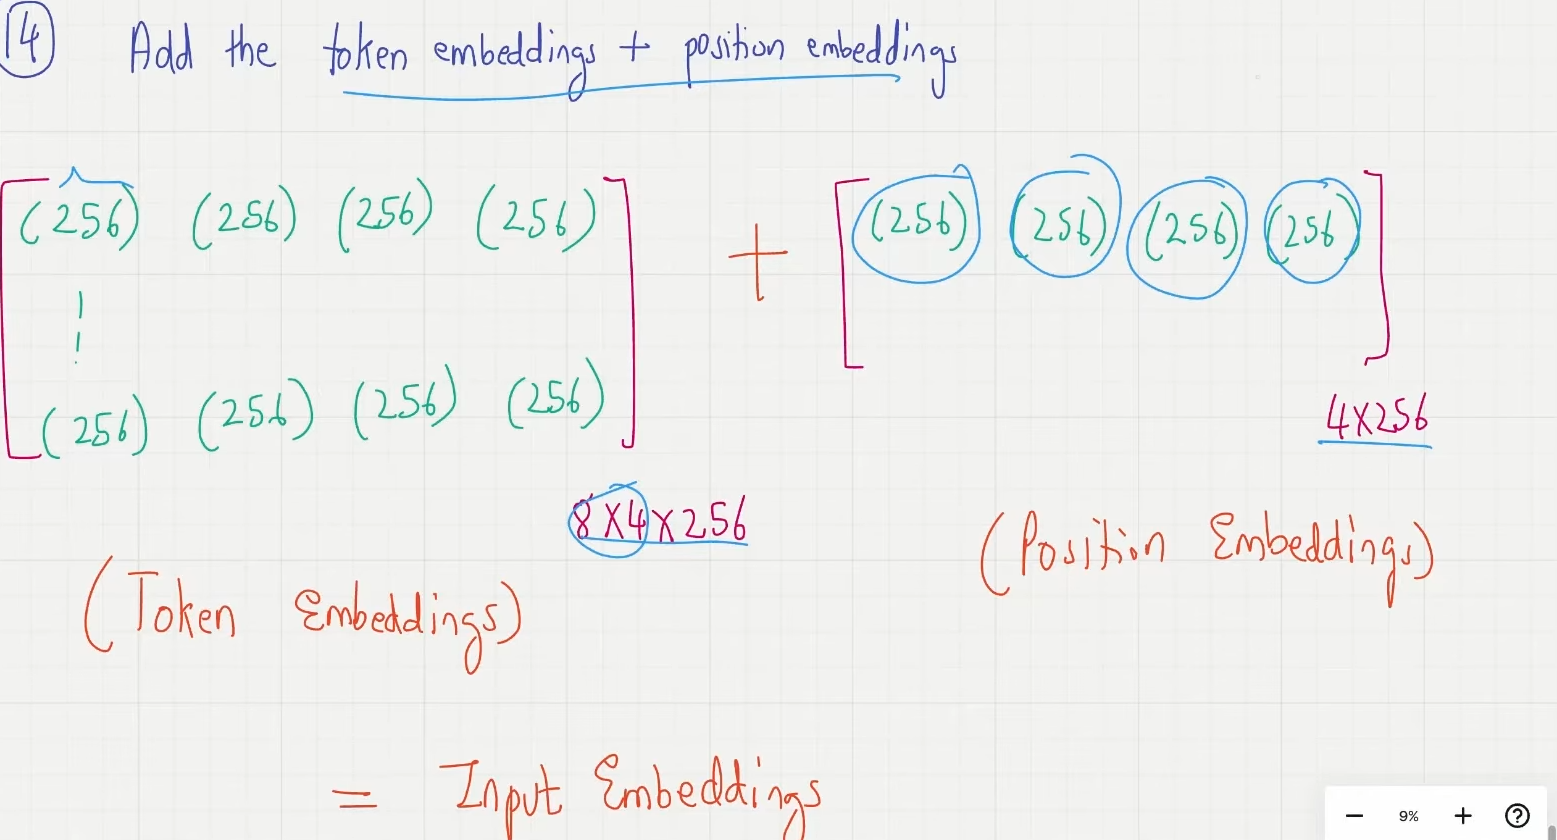

Tokenizer

In [2]:
with open("Data.txt", "r", encoding="utf-8") as file:
    raw_text=file.read()
    
print("total number of characters: ", len(raw_text))
print(raw_text[:99])

total number of characters:  20482
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


How can we best split the text to get the tokens?

In [ ]:
#this is just the idea

text=" It's the last he painted, you know , Mrs. Gisburn said with pardonable pride --. "
result=re.split(r'([,.:;?_!"()\']|--|\s)', text)
result=[item.strip() for item in result if item.strip()!=""]
print(result)

['It', "'", 's', 'the', 'last', 'he', 'painted', ',', 'you', 'know', ',', 'Mrs', '.', 'Gisburn', 'said', 'with', 'pardonable', 'pride', '--', '.']


In [8]:
preprocessed =re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed=[item.strip() for item in preprocessed if item.strip()!=""]
print(preprocessed[:20])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was']


In [9]:
print(len(preprocessed))

4690


In [11]:
#to do the tokenization arrange the tokens in ascending order  and then remove duplicates and assign each token an integer id

all_tokens= sorted(set(preprocessed))
vocab_size=len(all_tokens)
print("vocabulary size: ", vocab_size)

vocabulary size:  1130


In [14]:
vocab={token:integer for integer, token in enumerate(all_tokens)}
print(len(vocab))
print(vocab)

1130
{'!': 0, '"': 1, "'": 2, '(': 3, ')': 4, ',': 5, '--': 6, '.': 7, ':': 8, ';': 9, '?': 10, 'A': 11, 'Ah': 12, 'Among': 13, 'And': 14, 'Are': 15, 'Arrt': 16, 'As': 17, 'At': 18, 'Be': 19, 'Begin': 20, 'Burlington': 21, 'But': 22, 'By': 23, 'Carlo': 24, 'Chicago': 25, 'Claude': 26, 'Come': 27, 'Croft': 28, 'Destroyed': 29, 'Devonshire': 30, 'Don': 31, 'Dubarry': 32, 'Emperors': 33, 'Florence': 34, 'For': 35, 'Gallery': 36, 'Gideon': 37, 'Gisburn': 38, 'Gisburns': 39, 'Grafton': 40, 'Greek': 41, 'Grindle': 42, 'Grindles': 43, 'HAD': 44, 'Had': 45, 'Hang': 46, 'Has': 47, 'He': 48, 'Her': 49, 'Hermia': 50, 'His': 51, 'How': 52, 'I': 53, 'If': 54, 'In': 55, 'It': 56, 'Jack': 57, 'Jove': 58, 'Just': 59, 'Lord': 60, 'Made': 61, 'Miss': 62, 'Money': 63, 'Monte': 64, 'Moon-dancers': 65, 'Mr': 66, 'Mrs': 67, 'My': 68, 'Never': 69, 'No': 70, 'Now': 71, 'Nutley': 72, 'Of': 73, 'Oh': 74, 'On': 75, 'Once': 76, 'Only': 77, 'Or': 78, 'Perhaps': 79, 'Poor': 80, 'Professional': 81, 'Renaissance': 82

In [15]:
class SimpleTokenizerv1:
    def __init__(self, vocab):
        self.str_to_int= vocab
        self.int_to_str={i : s for s,i in vocab.items()}   #for every string, integer pair in the vocab dictionary create a dictionary with integer as key and string as value i.e. reverse mapping
        
    def encode(self, text):
        re_tokens = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        result = [token for token in re_tokens if token.strip() != '']
        token_ids= [self.str_to_int[token] for token in result] #assign ids to each word , i .e token
        return token_ids  # assign  token ids
    def decode(self, token_ids):
        text= " ".join([self.int_to_str[id] for id in token_ids])
        
        text=re.sub(r'\s([.,!?;:_()\"“”‘’\'])', r'\1', text)  #replace space before punctuation
        return text

In [16]:
tokenizer= SimpleTokenizerv1(vocab)

text=" It's the last he painted, you know , Mrs. Gisburn said with pardonable pride. "
ids= tokenizer.encode(text)
print(ids)

[56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 67, 7, 38, 851, 1108, 754, 793, 7]


In [17]:
tokenizer.decode(ids)

"It' s the last he painted, you know, Mrs. Gisburn said with pardonable pride."

Context vector Enriched embedding vector or  Implementing a simplified attention mechanism

In [ ]:
" We will look for a word and try to find context vector of that word"
"task is to implement a embedding token into a context vector for a word  "

"First task to compute the attention score between words in a sentence"

"Your journey starts with one step at a time."


"Query is the word for which we want to find context vector"


In [1]:
import torch

In [2]:
inputs= torch.tensor([[0.49, 0.15, 0.89], #your
                     [0.55, 0.87, 0.66], #journey
                     [0.39, 0.67, 0.29], #to
                     [0.10, 0.44, 0.78], #the
                     [0.12, 0.22, 0.32], #moon
                     [0.57, 0.80, 0.55]])  #starts
print(inputs.shape)  # (6,3) 6 words with embedding dimension of 3

torch.Size([6, 3])


In [3]:
inputs[0]

tensor([0.4900, 0.1500, 0.8900])

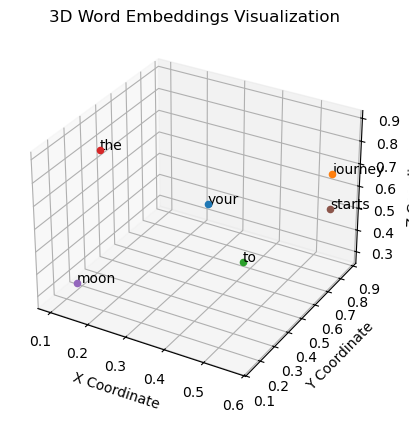

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


all_words=["your", "journey", "to", "the", "moon", "starts"]

x_coords=inputs[:,0].numpy()
y_coords=inputs[:,1].numpy()
z_coords=inputs[:,2].numpy()

#create a 3D vector space
fig=plt.figure()
ax= fig.add_subplot(111, projection='3d')
for i in range(len(all_words)):
    ax.scatter(x_coords[i], y_coords[i], z_coords[i], marker='o')
    ax.text(x_coords[i], y_coords[i], z_coords[i], all_words[i])

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
ax.set_title('3D Word Embeddings Visualization')
plt.show()


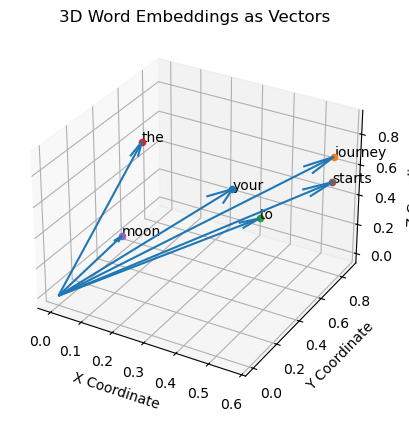

In [5]:
#plot the vectors in 3D space
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  
for i in range(len(all_words)):
    ax.scatter(x_coords[i], y_coords[i], z_coords[i], marker='o')
    ax.quiver(0, 0, 0, x_coords[i], y_coords[i], z_coords[i], arrow_length_ratio=0.1)
    ax.text(x_coords[i], y_coords[i], z_coords[i], all_words[i])
    
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')   
ax.set_zlabel('Z Coordinate')
ax.set_title('3D Word Embeddings as Vectors')
plt.show()


In [6]:
# we will compute attention score between "journey" and other words in the sentence
#so journey is our query vector
query_vector= inputs[1]  # journey  
print(query_vector)  # tensor([0.5500, 0.8700, 0.6600])

tensor([0.5500, 0.8700, 0.6600])


In [7]:
#we need to compute dot product between query vector and all other word vectors to get attention scores
attention_scores_np= np.matmul(inputs, query_vector)
print(attention_scores_np)  # numpy array of attention scores

tensor([0.9874, 1.4950, 0.9888, 0.9526, 0.4686, 1.3725])


In [8]:
attention_scores_torch= torch.matmul(inputs, query_vector) # use matmul for matrix multiplication
print(attention_scores_torch)  # tensor of attention scores

tensor([0.9874, 1.4950, 0.9888, 0.9526, 0.4686, 1.3725])


In [9]:
#logic is : (inputs[i]) * query_vector = attention_scores_torch[i]

In [10]:
attention_scores_torch= torch.empty(inputs.shape[0])
for i in range(len(all_words)):
    attention_scores_torch[i] = torch.dot(inputs[i], query_vector) # we can use dot product
    print(f"Attention score between 'journey' and '{all_words[i]}': {attention_scores_torch[i].item()}")

Attention score between 'journey' and 'your': 0.9874000549316406
Attention score between 'journey' and 'journey': 1.4950001239776611
Attention score between 'journey' and 'to': 0.988800048828125
Attention score between 'journey' and 'the': 0.9526000022888184
Attention score between 'journey' and 'moon': 0.46860000491142273
Attention score between 'journey' and 'starts': 1.3725000619888306


In [11]:
attention_scores_torch

tensor([0.9874, 1.4950, 0.9888, 0.9526, 0.4686, 1.3725])

In [12]:
#normalize the attention scores to understand them better
import torch.nn.modules as nn
attention_weights= nn.Softmax(dim=0)(attention_scores_torch)

In [13]:
print(attention_weights)

tensor([0.1494, 0.2482, 0.1496, 0.1443, 0.0889, 0.2196])


In [14]:
sum(attention_weights).item()  # should be 1.0

1.0000001192092896

In [15]:
for i in range(len(all_words)):
    print(f"Normalized attention score between 'journey' and '{all_words[i]}': {attention_weights[i].item()}")

Normalized attention score between 'journey' and 'your': 0.1493988037109375
Normalized attention score between 'journey' and 'journey': 0.24819612503051758
Normalized attention score between 'journey' and 'to': 0.14960810542106628
Normalized attention score between 'journey' and 'the': 0.14428913593292236
Normalized attention score between 'journey' and 'moon': 0.08892730623483658
Normalized attention score between 'journey' and 'starts': 0.21958056092262268


In [49]:
#now compute context vector for the word "journey"

query= inputs[1]  # journey
context_vec_journey=torch.zeros(query.shape[0])
for i ,x_i in enumerate(inputs):
    print(" This is x_i:", x_i)
    # print(" This is attention weight:", attention_weights[i])
    # print("this is old context vec:", context_vec_journey)
    context_vec_journey += attention_weights[i] * x_i  # weighted sum of input vectors
    
print(context_vec_journey)# this will be context vector for the word journey, since attention scores were calculated for the same word

 This is x_i: tensor([0.4900, 0.1500, 0.8900])
 This is x_i: tensor([0.5500, 0.8700, 0.6600])
 This is x_i: tensor([0.3900, 0.6700, 0.2900])
 This is x_i: tensor([0.1000, 0.4400, 0.7800])
 This is x_i: tensor([0.1200, 0.2200, 0.3200])
 This is x_i: tensor([0.5700, 0.8000, 0.5500])
tensor([0.4183, 0.5973, 0.6019])


torch.Size([6, 3])


Text(0.5, 0, 'Z Coordinate')

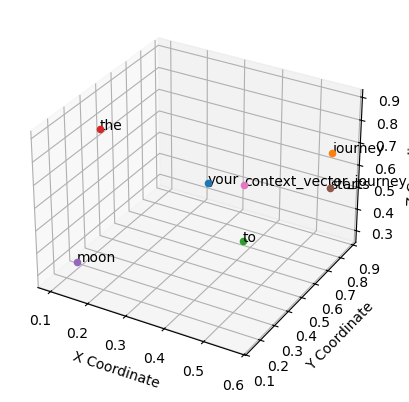

In [17]:
# just for showing how context vector will look in vector dimension

inputs_with_context= torch.tensor([[0.49, 0.15, 0.89], #your
                     [0.55, 0.87, 0.66], #journey
                     [0.39, 0.67, 0.29], #to
                     [0.10, 0.44, 0.78], #the
                     [0.12, 0.22, 0.32], #moon
                     [0.57, 0.80, 0.55],  #starts
                     [0.4183, 0.5973, 0.6019]])  #CONTEXT VECTOR FOR JOURNEY
print(inputs.shape)  # (6,3) 6 words with embedding dimension of 3

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_coords=inputs_with_context[:,0].numpy()
y_coords=inputs_with_context[:,1].numpy()
z_coords=inputs_with_context[:,2].numpy()
for i in range(len(all_words)+1):
    ax.scatter(x_coords[i], y_coords[i], z_coords[i], marker='o')
    if i < len(all_words):
        ax.text(x_coords[i], y_coords[i], z_coords[i], all_words[i])
    else:
        ax.text(x_coords[i], y_coords[i], z_coords[i], "context_vector_journey")
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')    

In [18]:
print(inputs.shape)

torch.Size([6, 3])


In [19]:
attention_scores_query=torch.zeros(inputs.shape[0],inputs.shape[0])
attention_weights_query=torch.zeros(inputs.shape[0], inputs.shape[0])
print(attention_weights_query)
print(attention_scores_query)

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])


In [41]:

context_vector= torch.zeros((inputs.shape[0], inputs.shape[1]))# (number of words, embedding dimension)
for i , x_i in enumerate(inputs): #for every word in the metrics
    for j , x_j in enumerate(inputs): # dot product with every word in the metric 
        print(f"Calculating attention score between '{all_words[i]}' and '{all_words[j]}'")
        attention_scores_query[i][j] = torch.dot(x_i, x_j)

print(attention_scores_query)

Calculating attention score between 'your' and 'your'
Calculating attention score between 'your' and 'journey'
Calculating attention score between 'your' and 'to'
Calculating attention score between 'your' and 'the'
Calculating attention score between 'your' and 'moon'
Calculating attention score between 'your' and 'starts'
Calculating attention score between 'journey' and 'your'
Calculating attention score between 'journey' and 'journey'
Calculating attention score between 'journey' and 'to'
Calculating attention score between 'journey' and 'the'
Calculating attention score between 'journey' and 'moon'
Calculating attention score between 'journey' and 'starts'
Calculating attention score between 'to' and 'your'
Calculating attention score between 'to' and 'journey'
Calculating attention score between 'to' and 'to'
Calculating attention score between 'to' and 'the'
Calculating attention score between 'to' and 'moon'
Calculating attention score between 'to' and 'starts'
Calculating atte

In [42]:
# now we dont want to use the two loops instead if multiplying the input matrix with its transpose

attention_scores_query= inputs @ inputs.T  # matrix multiplication
print(attention_scores_query)

tensor([[1.0547, 0.9874, 0.5497, 0.8092, 0.3766, 0.8888],
        [0.9874, 1.4950, 0.9888, 0.9526, 0.4686, 1.3725],
        [0.5497, 0.9888, 0.6851, 0.5600, 0.2870, 0.9178],
        [0.8092, 0.9526, 0.5600, 0.8120, 0.3584, 0.8380],
        [0.3766, 0.4686, 0.2870, 0.3584, 0.1652, 0.4204],
        [0.8888, 1.3725, 0.9178, 0.8380, 0.4204, 1.2674]])


In [27]:
#dim in softmax is 0 to normalize across columns and 1 to normalize across rows
attention_weights_query= nn.Softmax(dim=1)(attention_scores_query)
print(attention_weights_query)  

tensor([[0.2139, 0.2000, 0.1291, 0.1673, 0.1086, 0.1812],
        [0.1494, 0.2482, 0.1496, 0.1443, 0.0889, 0.2196],
        [0.1445, 0.2242, 0.1654, 0.1460, 0.1111, 0.2088],
        [0.1785, 0.2060, 0.1391, 0.1790, 0.1137, 0.1837],
        [0.1710, 0.1875, 0.1564, 0.1679, 0.1384, 0.1787],
        [0.1495, 0.2425, 0.1539, 0.1421, 0.0936, 0.2183]])


In [29]:
row_2_sum=sum(attention_weights_query[2])
print(row_2_sum)

tensor(1.0000)


In [45]:
#computing context vector by multiplying attention weights with input embeddings beacause each row in attention weights corresponds to a word in the input embeddings
all_context_vectors=attention_weights_query @ inputs
print(all_context_vectors)  # each row is context vector for each word

tensor([[0.3982, 0.5350, 0.6247],
        [0.4183, 0.5973, 0.6019],
        [0.4056, 0.5833, 0.5888],
        [0.3913, 0.5499, 0.6122],
        [0.3832, 0.5409, 0.5949],
        [0.4166, 0.5943, 0.5987]])


Self attention mechanism with trainiable weights

Objective: compute the context vector again
drawback of simplified self attention: we are giving imporatance to meanings in a sentence where we are somehow able to 
capture some context, but what if word with not that much semantics have a higher importance for that context?

In [137]:
inputs= torch.tensor([[0.49, 0.15, 0.89], #your
                     [0.55, 0.87, 0.66], #journey
                     [0.39, 0.67, 0.29], #to
                     [0.10, 0.44, 0.78], #the
                     [0.12, 0.22, 0.32], #moon
                     [0.57, 0.80, 0.55]])  #starts
print(inputs.shape)  # (6,3) 6 words with embedding dimension of 3

torch.Size([6, 3])


In [51]:
x_2=inputs[1] #A
d_in= inputs.shape[1]  # embedding dimension  #B
d_out= 2  #C

In [65]:
torch.manual_seed(12)
W_query=torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad=False)
W_key=torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad=False)
W_value=torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad=False)


In [69]:
print(W_query)

Parameter containing:
tensor([[0.4657, 0.2328],
        [0.4527, 0.5871],
        [0.4086, 0.1272]])


In [66]:
print(W_key)

Parameter containing:
tensor([[0.6373, 0.2421],
        [0.7312, 0.7224],
        [0.1992, 0.6948]])


In [67]:
keys= inputs @ W_key  # (6,2)
queries= inputs @ W_query  # (6,2) 
values= inputs @ W_value  # (6,2)

print("Keys shape:", keys.shape)
print("Queries shape:", queries.shape)
print("Values shape:", values.shape)    

Keys shape: torch.Size([6, 2])
Queries shape: torch.Size([6, 2])
Values shape: torch.Size([6, 2])


In [68]:
# lets compute attention score between "journey" and other words in the sentence
query_2= queries[1]  # journey
print(query_2)

tensor([0.9197, 0.7227])


In [71]:
print(keys)
print(queries)
print(values)

tensor([[0.5993, 0.8454],
        [1.1181, 1.2202],
        [0.7962, 0.7799],
        [0.5409, 0.8840],
        [0.3011, 0.4103],
        [1.0578, 1.0981]])
tensor([[0.6598, 0.3153],
        [0.9197, 0.7227],
        [0.6034, 0.5210],
        [0.5645, 0.3808],
        [0.2862, 0.1978],
        [0.8524, 0.6723]])
tensor([[1.2404, 1.0799],
        [1.4504, 1.0146],
        [0.8837, 0.5758],
        [1.0665, 0.7773],
        [0.5055, 0.3738],
        [1.3155, 0.9255]])


In [74]:
attention_score_query_keys= queries[1] @ keys.T  # dot product between query of word 'journey' and all keys 

In [75]:
print(attention_score_query_keys)

tensor([1.1621, 1.9103, 1.2960, 1.1364, 0.5735, 1.7665])


In [77]:
#normalize the attention scores
attention_weights= nn.Softmax(dim=0)(attention_score_query_keys)
print(attention_weights)

tensor([0.1313, 0.2775, 0.1501, 0.1280, 0.0729, 0.2403])


In [78]:
#lets find attention score for all words
attention_score_all= queries @ keys.T
print(attention_score_all)

tensor([[0.6619, 1.1225, 0.7713, 0.6356, 0.3280, 1.0441],
        [1.1621, 1.9103, 1.2960, 1.1364, 0.5735, 1.7665],
        [0.8021, 1.3105, 0.8868, 0.7870, 0.3955, 1.2104],
        [0.6602, 1.0959, 0.7465, 0.6420, 0.3262, 1.0153],
        [0.3387, 0.5614, 0.3822, 0.3297, 0.1673, 0.5200],
        [1.0792, 1.7735, 1.2030, 1.0554, 0.5325, 1.6399]])


In [82]:
#scale by the square root of the dimension of the key vectors
d_k= keys.shape[-1]  # dimension of key vectors columsn size
print(d_k)
scaled_attention_scores= attention_score_all / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))
print(scaled_attention_scores)

2
tensor([[0.4681, 0.7937, 0.5454, 0.4494, 0.2320, 0.7383],
        [0.8218, 1.3508, 0.9164, 0.8035, 0.4055, 1.2491],
        [0.5672, 0.9267, 0.6271, 0.5565, 0.2796, 0.8559],
        [0.4668, 0.7749, 0.5278, 0.4539, 0.2307, 0.7179],
        [0.2395, 0.3970, 0.2702, 0.2331, 0.1183, 0.3677],
        [0.7631, 1.2540, 0.8507, 0.7463, 0.3765, 1.1596]])


In [84]:
attention_weights=nn.Softmax(dim=1)(scaled_attention_scores)
print(attention_weights)

tensor([[0.1527, 0.2115, 0.1650, 0.1499, 0.1206, 0.2001],
        [0.1434, 0.2435, 0.1577, 0.1409, 0.0946, 0.2199],
        [0.1522, 0.2181, 0.1616, 0.1506, 0.1142, 0.2032],
        [0.1542, 0.2098, 0.1639, 0.1522, 0.1217, 0.1982],
        [0.1608, 0.1883, 0.1658, 0.1598, 0.1425, 0.1828],
        [0.1455, 0.2377, 0.1588, 0.1430, 0.0988, 0.2162]])


In [98]:
print(sum(attention_weights[1]))

tensor(1.0000)


In [86]:
context_vectors=attention_weights @ values
print(context_vectors)

tensor([[1.1263, 0.8214],
        [1.1578, 0.8411],
        [1.1337, 0.8266],
        [1.1250, 0.8210],
        [1.1020, 0.8068],
        [1.1524, 0.8379]])


Implement a python class

In [ ]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):  #inherit from nn.Module 
    def __init__(self, d_in, d_out):
        
        super().__init__() # super to get this init method called instead to parent class init
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))
    
    def forward(self, inputs):
        keys = inputs @ self.W_key # w_key is trainable weight matrix
        queries = inputs @ self.W_query # w_query is trainable weight matrix
        values = inputs @ self.W_value # w_value is trainable weight matrix
        
        attention_scores = queries @ keys.T
        
        # scale scores, then apply Softmax correctly (call the module with the tensor)
        scaled_scores = attention_scores / (keys.shape[-1] ** 0.5)
        attention_weights = nn.Softmax(dim=-1)(scaled_scores)
        
        context_vectors = attention_weights @ values
        
        return context_vectors

In [131]:
torch.manual_seed(123)

sa_v1= SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2804, 0.8030],
        [0.2856, 0.8143],
        [0.2777, 0.7976],
        [0.2788, 0.7996],
        [0.2708, 0.7823],
        [0.2837, 0.8104]], grad_fn=<MmBackward0>)


In [129]:
print(sa_v1)

SelfAttention_v1()


Hiding future words with causal attention

In [2]:
import torch.nn as nn

class SelfAttention_v2(nn.Module):  #inherit from nn.Module 
    def __init__(self, d_in, d_out, qkv_bias=False):
        
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias) # d_in as rows and d_out as columns
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, inputs):
        keys = self.W_key(inputs)  # w_key is trainable weight matrix
        queries = self.W_query(inputs)  # w_query is trainable weight matrix
        values = self.W_value(inputs)  # w_value is trainable weight matrix

        attention_scores = queries @ keys.T
        
        # scale scores, then apply Softmax correctly (call the module with the tensor)
        scaled_scores = attention_scores / (keys.shape[-1] ** 0.5)
        attention_weights = nn.Softmax(dim=-1)(scaled_scores)
        
        context_vectors = attention_weights @ values
        
        return context_vectors

In [186]:

sa_v2= SelfAttention_v2(d_in, d_out)
queries=sa_v2.W_query(inputs)
keys=sa_v2.W_key(inputs)
attn_scores= queries @ keys.T
attn_weights= torch.softmax(attn_scores / (keys.shape[-1] ** 0.5), dim=-1) #squre root first then softmax since softmax is sensitive to input values so reducing variance
print(sa_v2(inputs))
print(sa_v2) 


print(attn_weights)

tensor([[ 0.2573, -0.1780],
        [ 0.2572, -0.1788],
        [ 0.2555, -0.1781],
        [ 0.2561, -0.1797],
        [ 0.2546, -0.1780],
        [ 0.2568, -0.1784]], grad_fn=<MmBackward0>)
SelfAttention_v2(
  (W_query): Linear(in_features=3, out_features=2, bias=False)
  (W_key): Linear(in_features=3, out_features=2, bias=False)
  (W_value): Linear(in_features=3, out_features=2, bias=False)
)
tensor([[0.1629, 0.1765, 0.1652, 0.1674, 0.1551, 0.1729],
        [0.1663, 0.1771, 0.1641, 0.1656, 0.1533, 0.1737],
        [0.1662, 0.1726, 0.1653, 0.1662, 0.1591, 0.1706],
        [0.1710, 0.1755, 0.1631, 0.1634, 0.1538, 0.1731],
        [0.1675, 0.1706, 0.1655, 0.1658, 0.1612, 0.1694],
        [0.1651, 0.1759, 0.1647, 0.1664, 0.1552, 0.1727]],
       grad_fn=<SoftmaxBackward0>)


In [187]:
context_length=attn_scores.shape[0]
print(context_length)
mask=torch.zeros((context_length, context_length))
for i in range(context_length):  
     for j in range(context_length):
         mask[i][j]= 1 if i>=j else 0
print(mask)
  #or we can use torch tril function
mask_simple= torch.tril(torch.ones((context_length, context_length)))
print(mask_simple)


6
tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [188]:
context_masked= attn_weights*mask_simple # HIDDEN FUTURE WORDS 
print(context_masked)

tensor([[0.1629, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1663, 0.1771, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1662, 0.1726, 0.1653, 0.0000, 0.0000, 0.0000],
        [0.1710, 0.1755, 0.1631, 0.1634, 0.0000, 0.0000],
        [0.1675, 0.1706, 0.1655, 0.1658, 0.1612, 0.0000],
        [0.1651, 0.1759, 0.1647, 0.1664, 0.1552, 0.1727]],
       grad_fn=<MulBackward0>)


In [189]:
context_masked=  context_masked/ context_masked.sum(dim=-1, keepdim=True)  # re-normalize

In [190]:
print(context_masked)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4843, 0.5157, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3297, 0.3424, 0.3279, 0.0000, 0.0000, 0.0000],
        [0.2541, 0.2607, 0.2424, 0.2428, 0.0000, 0.0000],
        [0.2016, 0.2054, 0.1992, 0.1997, 0.1941, 0.0000],
        [0.1651, 0.1759, 0.1647, 0.1664, 0.1552, 0.1727]],
       grad_fn=<DivBackward0>)


In [ ]:
print(attn_scores.masked_fill(mask==0, float('-inf')))

tensor([[0.1591,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.2138, 0.3027,   -inf,   -inf,   -inf,   -inf],
        [0.1186, 0.1718, 0.1110,   -inf,   -inf,   -inf],
        [0.2395, 0.2762, 0.1730, 0.1756,   -inf,   -inf],
        [0.0928, 0.1192, 0.0758, 0.0791, 0.0390,   -inf],
        [0.1736, 0.2631, 0.1708, 0.1847, 0.0865, 0.2376]],
       grad_fn=<MaskedFillBackward0>)


In [ ]:
# to cancel the influence of future words during training we will mask attention score matrics upper triangular part with infinity so softmax will convert them to zero 

# Signature: tensor.masked_fill(mask, value)
# mask shape must be same as tensor or broadcastable to it.

inf_mask= torch.triu(torch.ones((context_length, context_length)) , diagonal=1)  # upper triangular matrix with -inf
# masked= attn_scores.masked_fill
print(inf_mask)

print(attn_scores)
attention_scores_masked= attn_scores.masked_fill(inf_mask.bool(), -torch.inf)  # makes upper triangular part -inf  where mask is true i.e 1

print(attention_scores_masked)

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])
tensor([[0.1591, 0.2728, 0.1794, 0.1982, 0.0901, 0.2436],
        [0.2138, 0.3027, 0.1950, 0.2081, 0.0993, 0.2753],
        [0.1186, 0.1718, 0.1110, 0.1190, 0.0564, 0.1559],
        [0.2395, 0.2762, 0.1730, 0.1756, 0.0899, 0.2571],
        [0.0928, 0.1192, 0.0758, 0.0791, 0.0390, 0.1095],
        [0.1736, 0.2631, 0.1708, 0.1847, 0.0865, 0.2376]],
       grad_fn=<MmBackward0>)
tensor([[0.1591,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.2138, 0.3027,   -inf,   -inf,   -inf,   -inf],
        [0.1186, 0.1718, 0.1110,   -inf,   -inf,   -inf],
        [0.2395, 0.2762, 0.1730, 0.1756,   -inf,   -inf],
        [0.0928, 0.1192, 0.0758, 0.0791, 0.0390,   -inf],
        [0.1736, 0.2631, 0.1708, 0.1847, 0.0865, 0.2376]],
       grad_fn=<MaskedFillBackward0>)


In [177]:
attention_weights_masked= torch.softmax(attention_scores_masked / (keys.shape[-1] ** 0.5), dim=-1)
print(attention_weights_masked)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4810, 0.5190, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3204, 0.3398, 0.3398, 0.0000, 0.0000, 0.0000],
        [0.2362, 0.2521, 0.2528, 0.2589, 0.0000, 0.0000],
        [0.1959, 0.2007, 0.2003, 0.2031, 0.2000, 0.0000],
        [0.1582, 0.1683, 0.1670, 0.1742, 0.1665, 0.1658]],
       grad_fn=<SoftmaxBackward0>)


In [179]:
value_metrics= sa_v2.W_value(inputs)
print(value_metrics)

tensor([[0.3822, 0.6984],
        [0.7286, 0.9085],
        [0.5267, 0.5880],
        [0.3184, 0.5581],
        [0.1875, 0.2857],
        [0.6966, 0.8446]], grad_fn=<MmBackward0>)


In [180]:
context_vectors_masked= attention_weights_masked @ value_metrics
print(context_vectors_masked)

tensor([[0.3822, 0.6984],
        [0.5620, 0.8075],
        [0.5490, 0.7323],
        [0.4895, 0.6871],
        [0.4287, 0.6074],
        [0.4732, 0.6464]], grad_fn=<MmBackward0>)


Droupout elements implimentations randomly

In [204]:
torch.manual_seed(123)
example=torch.ones(6,6)
print(example)
dropout= torch.nn.Dropout(p=0.5)
example_dropped= dropout(example)
print(example_dropped)

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])


In [206]:
#NOW lets apply dropout to attention weights to prevent overfitting
torch.manual_seed(123)
dropout_layer = torch.nn.Dropout(p=0.5) # 50% dropoout
attention_weights_masked_dropped= dropout_layer(attention_weights_masked)

In [207]:

print(attention_weights_masked_dropped)

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 1.0381, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6797, 0.0000, 0.0000, 0.0000],
        [0.4724, 0.5042, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3919, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3367, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


In [208]:
context_vectors_dropped = attention_weights_masked_dropped @ value_metrics
print(context_vectors_dropped)

tensor([[0.7644, 1.3969],
        [0.7563, 0.9431],
        [0.3580, 0.3996],
        [0.5479, 0.7880],
        [0.1498, 0.2737],
        [0.2453, 0.3059]], grad_fn=<MmBackward0>)


Implementation of Causal Attention class, which will incoperate causal attention and dropout modifications into the self attention class        
 lets have 2 batch of text with 6 tokens, and 3 dimenions 
 (2,6,3)

In [270]:
class SelfAttentionCausalv1(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout=0.1, bias=False):
        
        super().__init__()
        self.d_out= d_out
        self.query=nn.Linear(d_in, d_out, bias=bias)
        self.key=nn.Linear(d_in, d_out, bias=bias)
        self.value=nn.Linear(d_in, d_out, bias=bias)
        self.dropout=nn.Dropout(dropout)
        self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length), diagonal=1))  # create a upper triangular matrix as buffer so that its not a parameter to be trained
        
    
    def forward(self, inputs):
        b, num_tokens, d_in= inputs.shape  #b= new batch size , num_tokens=context length, d_in= embedding dimension
        keys=self.key(inputs)
        queries=self.query(inputs)
        values=self.value(inputs)
        
       #queries =[[[1,0,2]],[3,0,1]], [[#batch 1, #token 1]  [#batch 1, token 2], [#batch 2, token 1], [#batch 2, token 2]]  #(2,2,3)
        
        #queries_transposed= [[[1,3],[0,0],[2,1]]]  # transpose inner two dimensions
        attn_scores= queries @ keys.transpose(1,2) #inside the keys metrics,we transpose the inner metrics
        attn_scores.masked_fill_(
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)  # _ for inplace, # apply mask where mask is 1 use -inf)  :'num_tokens' to handle variable length sequences in a batch
        attn_weights=torch.softmax(attn_scores/ keys.shape[-1]**0.5, dim=-1)
        attn_weights_dropped=self.dropout(attn_weights)
        
        context_vector= attn_weights_dropped @ values
        
        return context_vector

In [271]:
print(d_in)
print(d_out)

3
2


In [272]:
print(inputs)

tensor([[0.4900, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.3900, 0.6700, 0.2900],
        [0.1000, 0.4400, 0.7800],
        [0.1200, 0.2200, 0.3200],
        [0.5700, 0.8000, 0.5500]])


In [273]:
batch= torch.stack((inputs , inputs), dim=0)  # create a batch of 2 samples
print(batch.shape)  # (2,6,3) 2 samples each with 6 tokens and embedding dimension of 3

torch.Size([2, 6, 3])


In [274]:
#trying
print(batch[1 ,3: , 1:3])  # select  from batch 1, tokens from index 3 to end, embedding dimensions from index 1 to 3

tensor([[0.4400, 0.7800],
        [0.2200, 0.3200],
        [0.8000, 0.5500]])


In [275]:
torch.manual_seed(123)
context_length=batch.shape[1]  # context length from the batch
sa_causal_v2= SelfAttentionCausalv1(d_in, d_out,context_length, dropout=0.5)

context_vectors= sa_causal_v2(batch)
print(context_vectors)

print("Size of context vectors:", context_vectors.shape)  # (batch_size, num_tokens, d_out)

tensor([[[ 0.0000,  0.0000],
         [-0.4664,  0.2082],
         [-0.8016,  0.0060],
         [-0.7885, -0.1701],
         [ 0.0000,  0.0000],
         [-0.7076, -0.0668]],

        [[-0.9626,  0.4296],
         [ 0.0000,  0.0000],
         [-0.3137,  0.1400],
         [-0.7885, -0.1701],
         [-0.4395, -0.0446],
         [-0.3461, -0.0435]]], grad_fn=<UnsafeViewBackward0>)
Size of context vectors: torch.Size([2, 6, 2])


Extending  a multihead attention using causal attention:
 
multihead means we can have many key query value metrics and many context vectors at the end so that we can combine them

we can achieve this by implemeting a simple MultiHeadAttentionWrapper class that stacks multiple instances of CausalAttention module

In [276]:
class MultiHeadSelfAttentionwrapper(nn.Module):
    def __init__(self, d_in, d_out, num_heads, context_length, dropout=0.1, bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [SelfAttentionCausalv1(d_in, d_out, context_length, dropout, bias) for _ in range(num_heads)]
        )  # we get the output from the selfattention module multiple times equal to number of heads
        
        def forward(self, inputs):
            head_outputs = [head(inputs) for head in self.heads]  # get output from each head
            concatenated = torch.cat(head_outputs, dim=-1)  # concatenate along the last dimension
            return concatenated

Multihead attention using weights split

In [3]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x) # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim) 
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)
        
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2) 
        
        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec

In [5]:
import torch
torch.manual_seed(123)

# Define the tensor with 3 rows and 6 columns
inputs = torch.tensor(
    [[0.43, 0.15, 0.89, 0.55, 0.87, 0.66],  # Row 1
     [0.57, 0.85, 0.64, 0.22, 0.58, 0.33],  # Row 2
     [0.77, 0.25, 0.10, 0.05, 0.80, 0.55]]  # Row 3
)

batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape) 

batch_size, context_length, d_in = batch.shape
d_out = 6
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

torch.Size([2, 3, 6])
tensor([[[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]],

        [[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]]],
       grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 3, 6])
